<a href="https://colab.research.google.com/github/nirvanareis/estatistica-python/blob/main/Dolar2023_Analise%20Descritiva%20Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Python para Dados

Este exercício tem como objetivo avaliar sua familiaridade com o uso de Python para análise de dados, incluindo leitura de arquivos CSV, inspeção inicial do dataset e criação de um gráfico simples.

## 📄 Tarefa

Você irá trabalhar com um conjunto de dados contendo a cotação do dólar em 2023, fornecido pelo Banco Central do Brasil.

In [ ]:
#Importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Leitura dos dados
df_dolar_2023 = pd.read_csv('https://raw.githubusercontent.com/programacaodinamica/dicas-pandas/refs/heads/master/dados/bcdata-dolar-2023.csv', sep=';', decimal=',')

In [ ]:
#Conversão de tipo da coluna data
df_dolar_2023['data'] = pd.to_datetime(df_dolar_2023['data'], format='%d/%m/%Y')
df_dolar_2023.set_index('data', inplace=True)

In [ ]:
#Visualize as primeiras linhas do conjunto de dados

df_dolar_2023.head(15)

,valor
data,
2023-01-02,5.3430
2023-01-03,5.3753
2023-01-04,5.4453
2023-01-05,5.4020
2023-01-06,5.2849
2023-01-09,5.2961
2023-01-10,5.2389
2023-01-11,5.2014
2023-01-12,5.1394


In [ ]:
df_dolar_2023.tail()

,valor
data,
2023-12-22,4.8613
2023-12-26,4.8362
2023-12-27,4.8300
2023-12-28,4.8407
2023-12-29,4.8407


In [ ]:
df_dolar_2023['valor'].isnull().sum()

np.int64(0)

In [ ]:
df_dolar_2023.count()

,0
valor,249


**O método .count() retorna o número de valores não nulos por coluna. Aqui,  observamos as primeiras observações do dataset, as finais e que há 249 registros válidos — o que sugere que o dataset traz as cotações apenas dos dias úteis de 2023, já que finais de semana e feriados não têm cotação registrada. Isso reforça que a série temporal não é contínua em dias corridos, mas sim no calendário de negociações.**

In [ ]:
#Visualize os detalhes sobre os tipos de colunas no conjunto de dados

df_dolar_2023.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2023-01-02 to 2023-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   valor   249 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [ ]:
df_dolar_2023.describe()

,valor
count,249.000000
mean,4.994748
std,0.148686
min,4.719600
25%,4.884900
50%,4.967200
75%,5.095300
max,5.445300


**O describe trouxe um resumo estatístico da coluna valor. A cotaação média foi de R$4,99 com um valor mínimo de 4,72 e máximo de 5,44. O desvio padrão de aproximadamente 0,15 indica que o dólar se manteve relativamente estável ao longo do ano, com oscilações moderadas. Os quartis mostram que 50% das cotações ficaram entre 4,88 e 5,09.**

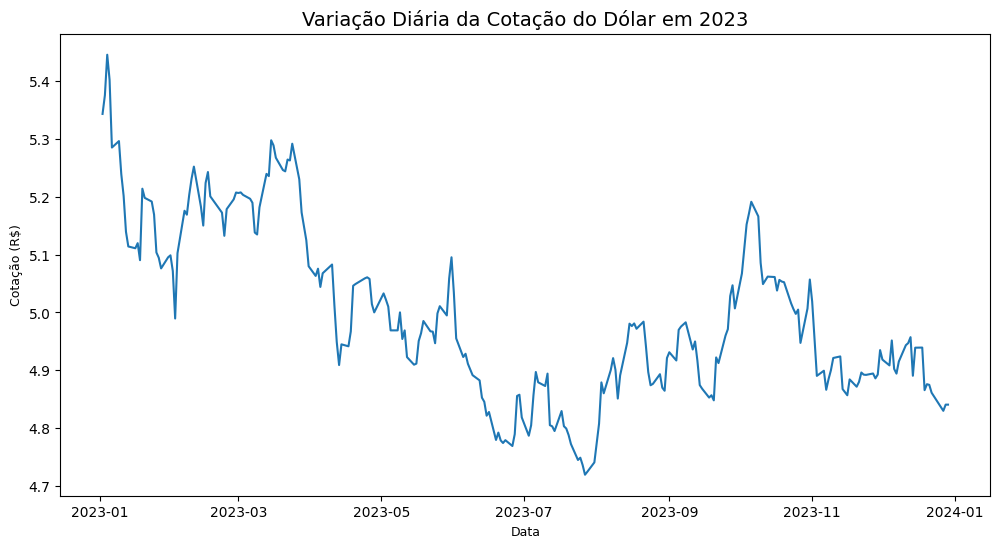

In [ ]:
#Implemente um gráfico da evolução mensal do dólar em 2023
#Para um gráfico mais legível modifique o tamanho da figura
#Opcional: Você também pode modificar a cor padrão do gráfico

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_dolar_2023.index, y = 'valor', data = df_dolar_2023)

plt.title('Variação Diária da Cotação do Dólar em 2023', fontsize=14)
plt.xlabel('Data', fontsize=9)
plt.ylabel('Cotação (R$)', fontsize=9)
plt.show()


**O gráfico de linha, gerado com sns.lineplot(), mostra que o dólar iniciou o ano em um patamar elevado, acima de  5,30, apresentou quedas importantes a partir de maio e atingiu os menores valores no meio do ano, próximos de R$ 4,75. Depois, houve recuperação parcial em setembro e outubro, mas sem retornar aos valores do início do ano. O parâmetro x=df_dolar_2023.index aproveitou o índice de datas que definimos antes, e y='valor' especificou a coluna de interesse.**

In [ ]:
media_mensal = df_dolar_2023['valor'].resample('M').mean()
print(media_mensal)

data
2023-01-31    5.200082
2023-02-28    5.171089
2023-03-31    5.210861
2023-04-30    5.019133
2023-05-31    4.982241
2023-06-30    4.850967
2023-07-31    4.800233
2023-08-31    4.902943
2023-09-30    4.936390
2023-10-31    5.064243
2023-11-30    4.897735
2023-12-31    4.896640
Freq: ME, Name: valor, dtype: float64


/tmp/ipython-input-1531066602.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = df_dolar_2023['valor'].resample('M').mean()


In [ ]:
nomes_meses = media_mensal.index.strftime('%b')

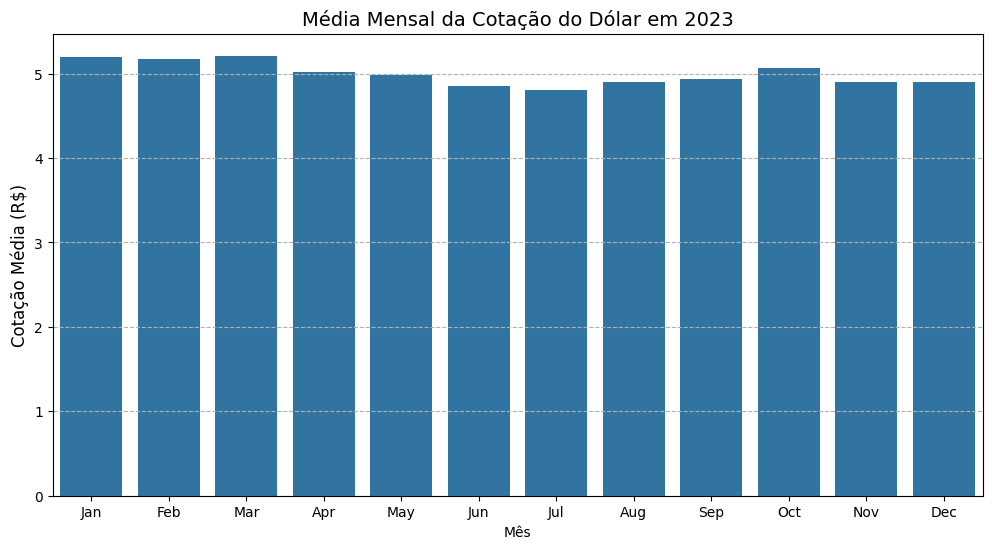

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=nomes_meses, y=media_mensal.values)

plt.title('Média Mensal da Cotação do Dólar em 2023', fontsize=14)
plt.xlabel('Mês', fontsize=10)
plt.ylabel('Cotação Média (R$)', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

**Para esse gráfico, utilizei resample('M').mean() para agrupar as cotações por mês e calcular a média mensal. Isso permitiu suavizar as variações diárias e observar tendências mais amplas. Os meses de janeiro a março registraram as maiores médias, acima de  5,15, enquanto junho e julho marcaram os valores mais baixos, abaixo de  4,90. Em outubro, vemos um leve aumento. O parâmetro 'M' no resample() agrupa por mês calendário, e .strftime('%b') formatou o índice para exibir abreviações como "Jan", "Feb", etc., tornando a visualização mais clara.**

In [ ]:
#Por fim, exporte o dataframe como um arquivo .csv

df_dolar_2023.to_csv('cotacao_dolar_2023.csv')